# Continuous Variables

In [1]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib as plt

import functions.continuous as funcs

# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')
print(f'matplotlib: {plt.__version__}')


numpy: 2.2.3
pandas: 2.2.3
scipy: 1.15.2
scikit-learn: 1.6.1
seaborn: 0.13.2
matplotlib: 3.10.1


In [5]:
df_exe = pd.read_csv('../data/raw/exercise.csv')
df_cal = pd.read_csv('../data/raw/calories.csv') 

In [6]:
df = pd.merge(df_exe, df_cal, on='User_ID', how='left')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
df_cont = df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']]

In [10]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         15000 non-null  int64  
 1   Height      15000 non-null  float64
 2   Weight      15000 non-null  float64
 3   Duration    15000 non-null  float64
 4   Heart_Rate  15000 non-null  float64
 5   Body_Temp   15000 non-null  float64
 6   Calories    15000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 820.4 KB


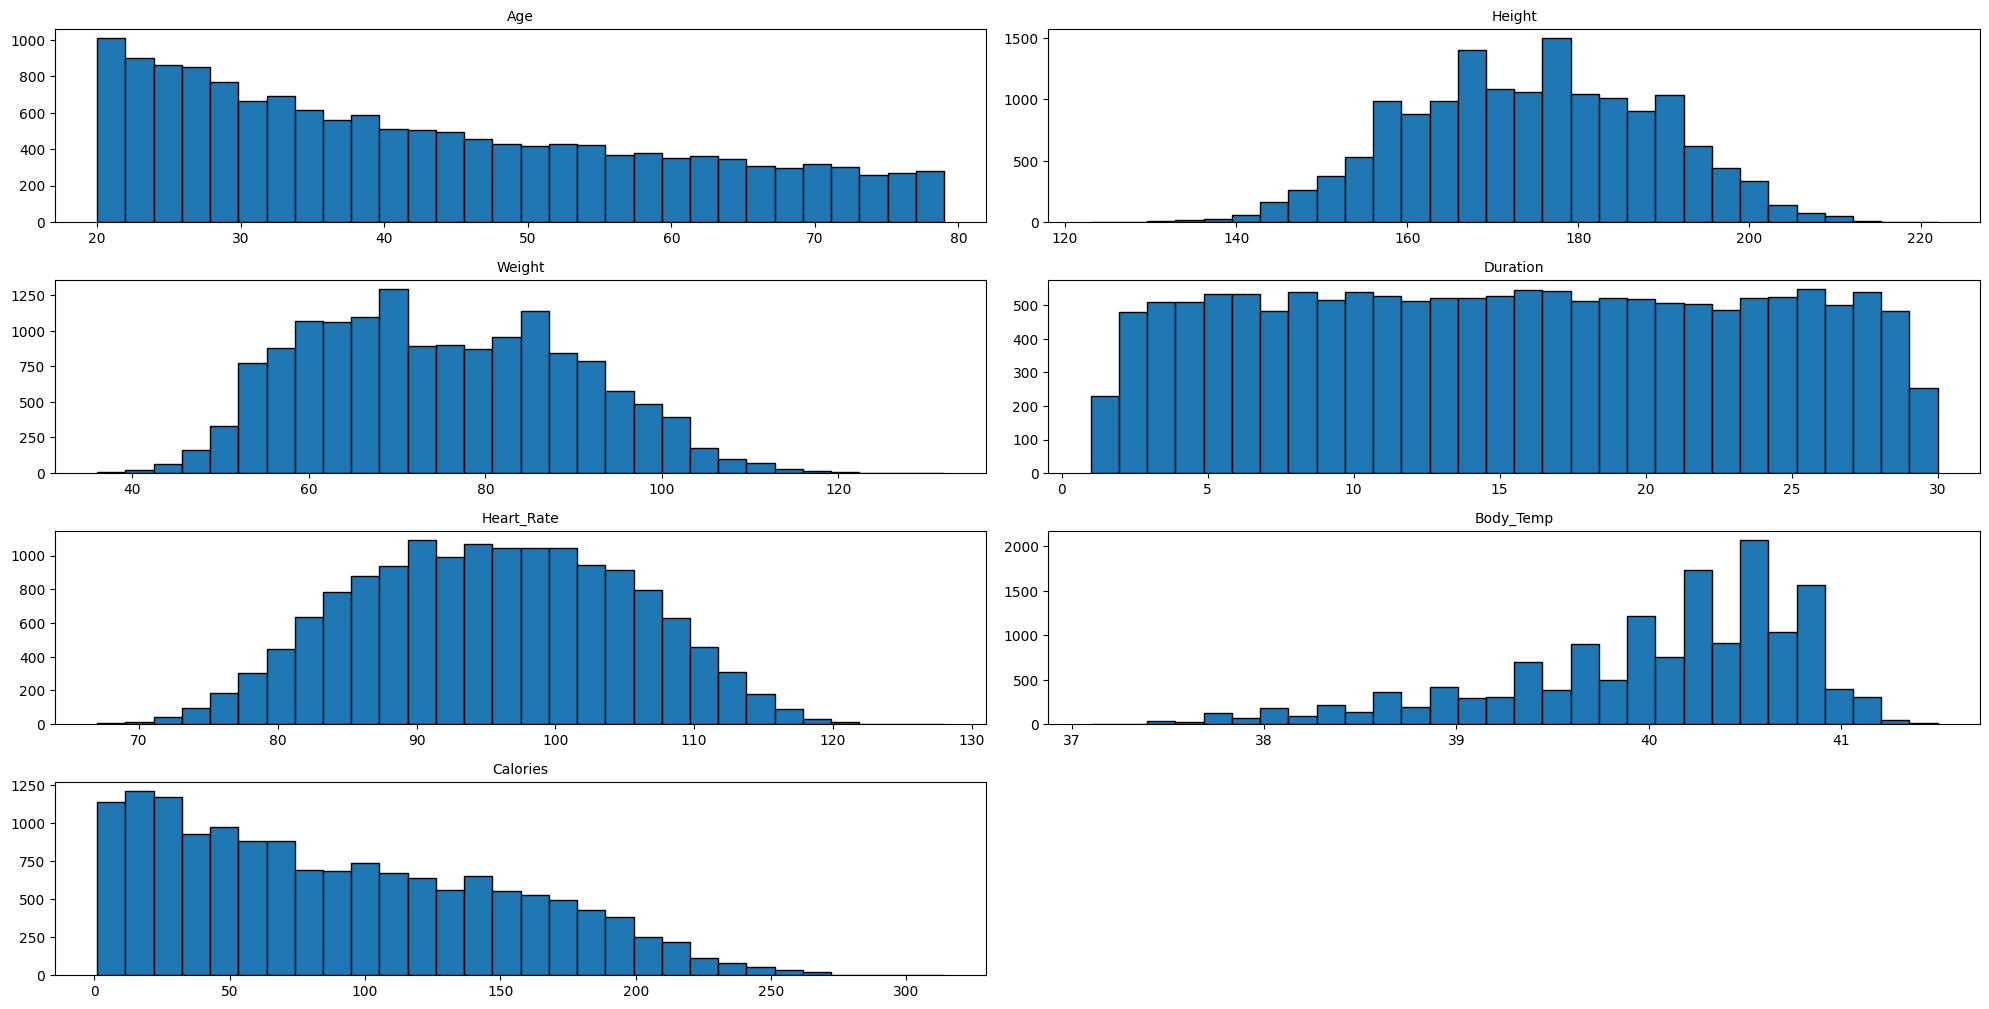

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Flatten the 2D axes array for easy indexing

for i, column in enumerate(df_cont.columns):
    axes[i].hist(df_cont[column], bins=30, edgecolor='black')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused subplots (if fewer than 14 columns)
for j in range(len(df_cont.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
df_cont.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0


In [43]:
#Focusing now on expected calories burned given workout type and duration
#As such, will need to normalize duration/kcal burned
#What do we need at this point? 
#Not sure we need step taken, distance, sleep, calories intake...



#let's do correlations- focusing on workout type, duration, kcal burned
#I want to do correlations between 

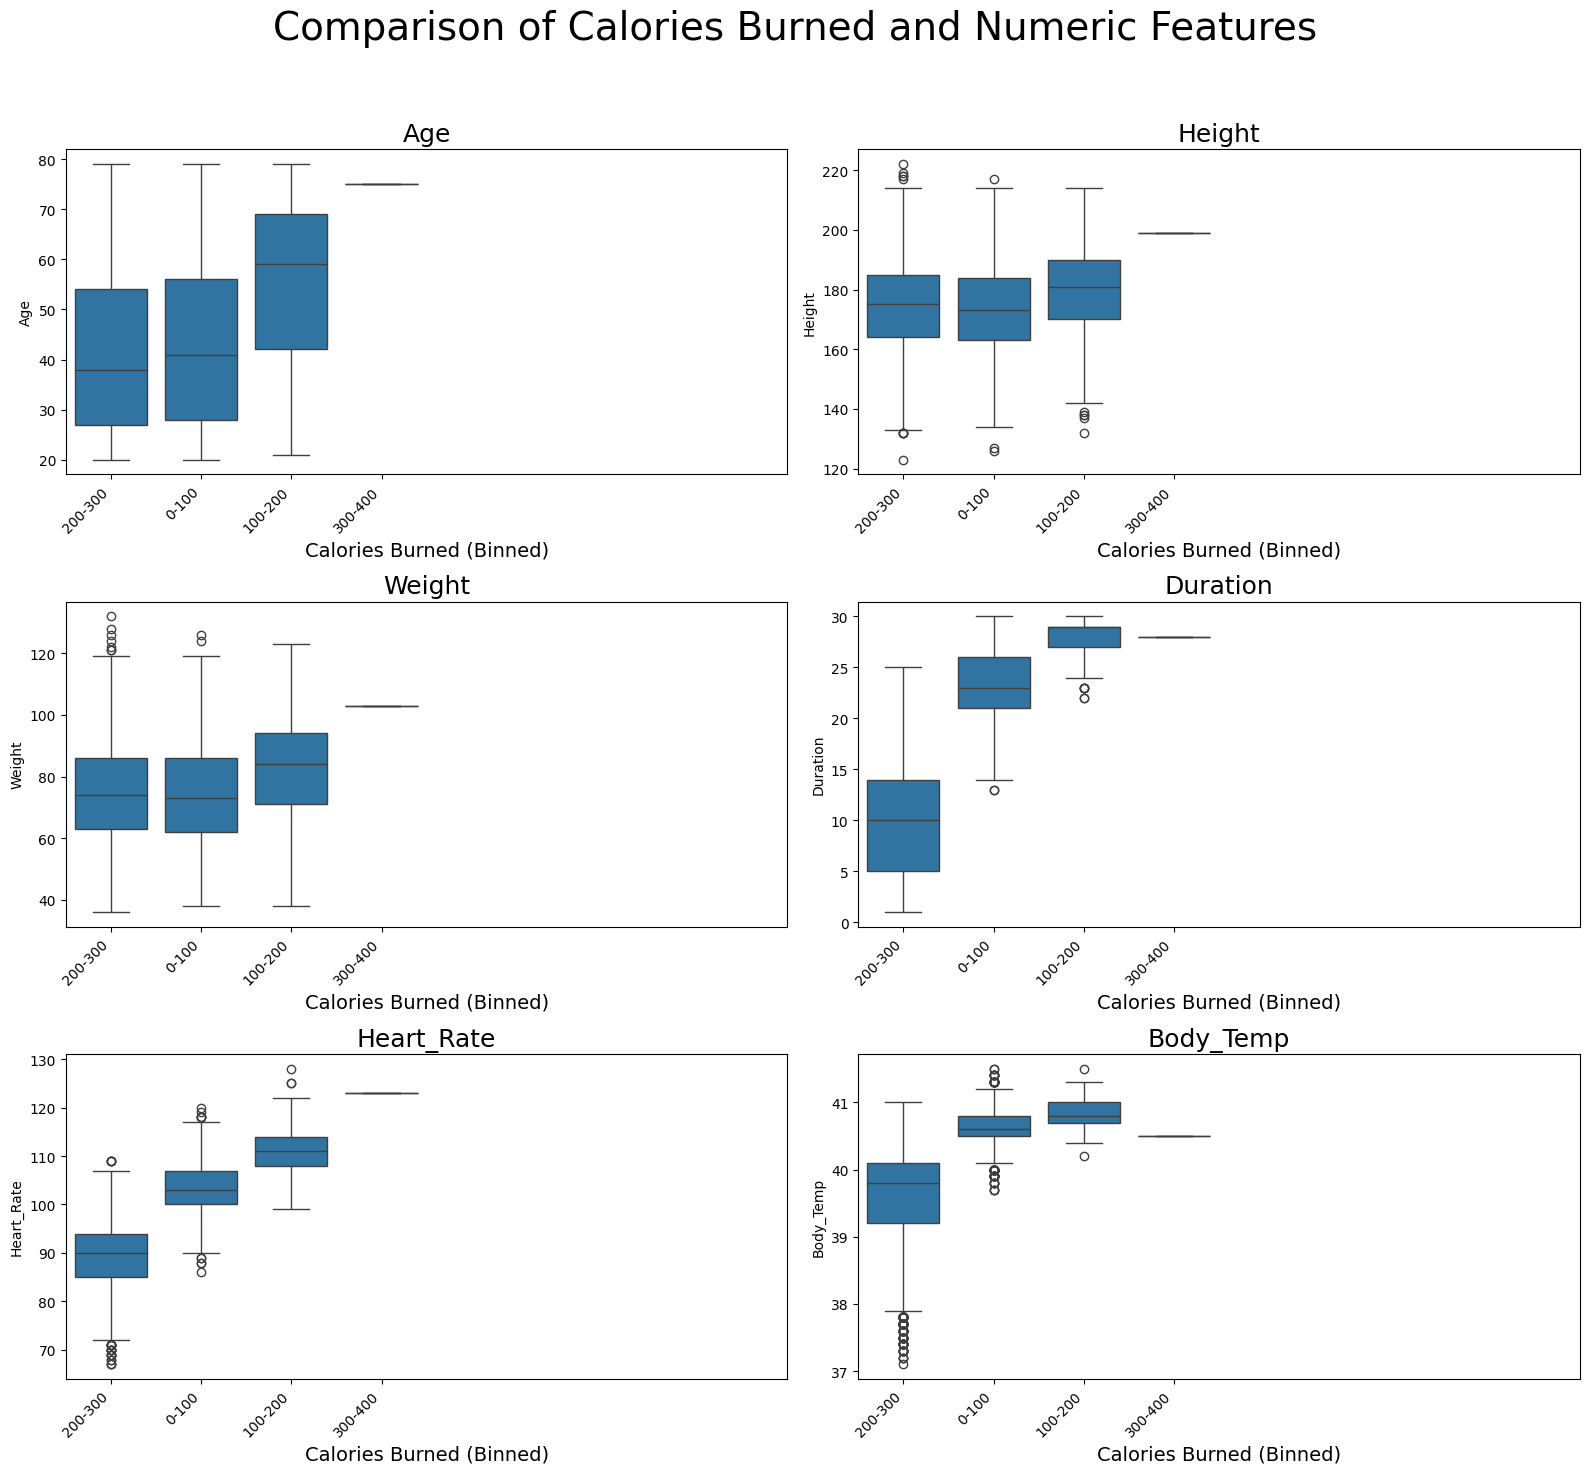

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import kurtosis
import math

# Only use numeric columns
features = df_cont.select_dtypes(include=['float64', 'int64']).columns.tolist()
features = [f for f in features if f != 'Calories']

# Choose layout
n_features = len(features)
n_cols = 2   # <-- 🔥 ONLY 2 plots per row to make them BIG
n_rows = math.ceil(n_features / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 5))
axs = axs.flatten()

fig.suptitle('Comparison of Calories Burned and Numeric Features', fontsize=28)

for idx, feature in enumerate(features):
    plot_df = df_cont[[feature, 'Calories']].dropna().copy()

    plot_df['Calories_bin'] = pd.cut(plot_df['Calories'], 
                                     bins=[0,100,200,300,400,500,600,800,1000],
                                     labels=['0-100','100-200','200-300','300-400','400-500','500-600','600-800','800-1000'])

    plot_df = plot_df.dropna(subset=['Calories_bin'])

    sns.boxplot(data=plot_df, x='Calories_bin', y=feature, ax=axs[idx])

    # --- 🔥 ONLY set ticks for bins that have data ---
    bins_in_data = plot_df['Calories_bin'].dropna().unique()
    axs[idx].set_xticks(range(len(bins_in_data)))
    axs[idx].set_xticklabels(bins_in_data, rotation=45, ha='right')

    axs[idx].set_title(feature, fontsize=18)
    axs[idx].set_xlabel('Calories Burned (Binned)', fontsize=14)

# Remove any unused axes
for j in range(idx + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [36]:
from itertools import product
import function as funcs
# Features to calculate correlation coefficients for
features=[
    'Age',
    'Height',
    'Weight',
    'Duration',
    'Calories',
    'Heart_Rate',
    'Body_Temp',
]

# Calculate the correlation coefficients between each pair of features
feature_pairs=list(set(tuple(sorted(pair)) for pair in product(features, features)))
correlations=funcs.get_correlations(feature_pairs, df_cont)

# Sort by Spearman rank and inspect
correlations_df=pd.DataFrame.from_dict(correlations)
correlations_df.sort_values('Spearman', inplace=True, ascending=False)
correlations_df.reset_index(inplace=True, drop=True)
correlations_df.head(len(correlations_df))

,Feature 1,Feature 2,Absolute Spearman,Spearman,Spearman p-value,Absolute Pearson,Pearson,Pearson p-value,Pearson r-squared
0,Calories,Duration,0.975835,0.975835,0.000000e+00,0.955421,0.955421,0.000000e+00,9.128284e-01
1,Height,Weight,0.961711,0.961711,0.000000e+00,0.958451,0.958451,0.000000e+00,9.186279e-01
2,Body_Temp,Duration,0.940759,0.940759,0.000000e+00,0.903167,0.903167,0.000000e+00,8.157105e-01
3,Body_Temp,Calories,0.919550,0.919550,0.000000e+00,0.824558,0.824558,0.000000e+00,6.798955e-01
4,Calories,Heart_Rate,0.915955,0.915955,0.000000e+00,0.897882,0.897882,0.000000e+00,8.061922e-01
5,Duration,Heart_Rate,0.862075,0.862075,0.000000e+00,0.852869,0.852869,0.000000e+00,7.273854e-01
6,Body_Temp,Heart_Rate,0.811278,0.811278,0.000000e+00,0.771529,0.771529,0.000000e+00,5.952563e-01
7,Age,Calories,0.134560,0.134560,1.496004e-61,0.154395,0.154395,1.120192e-80,2.383786e-02
8,Age,Weight,0.084512,0.084512,3.458465e-25,0.090094,0.090094,2.054699e-28,8.116968e-03
9,Calories,Weight,0.013349,0.013349,1.020922e-01,0.035481,0.035481,1.383445e-05,1.258872e-03


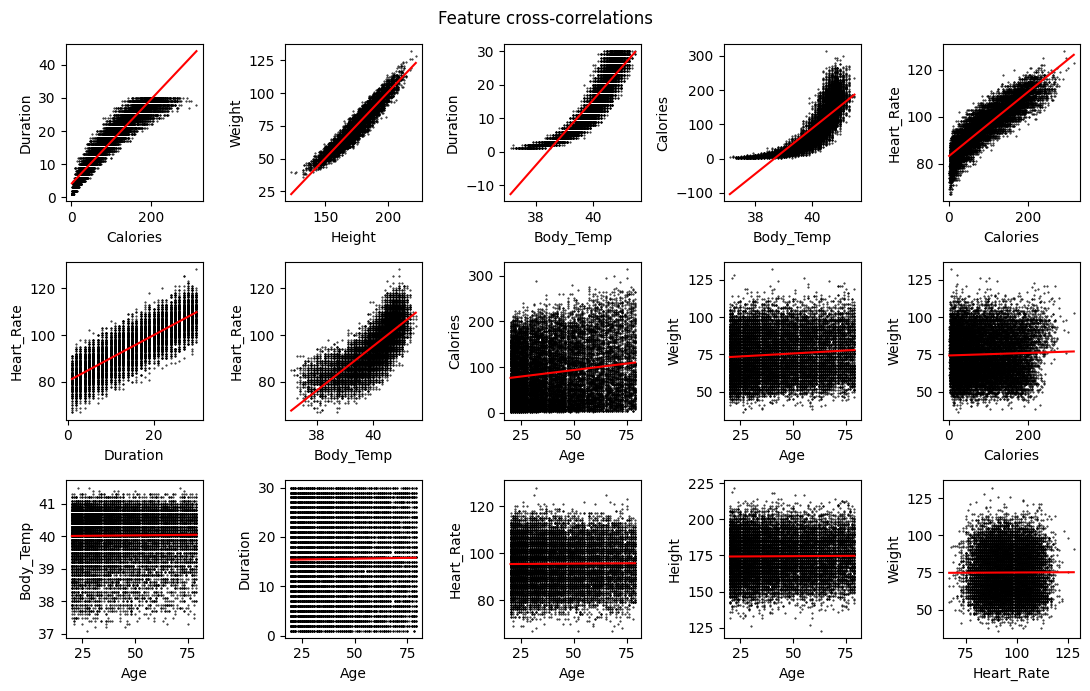

In [37]:
funcs.plot_correlations(df_cont, correlations_df)

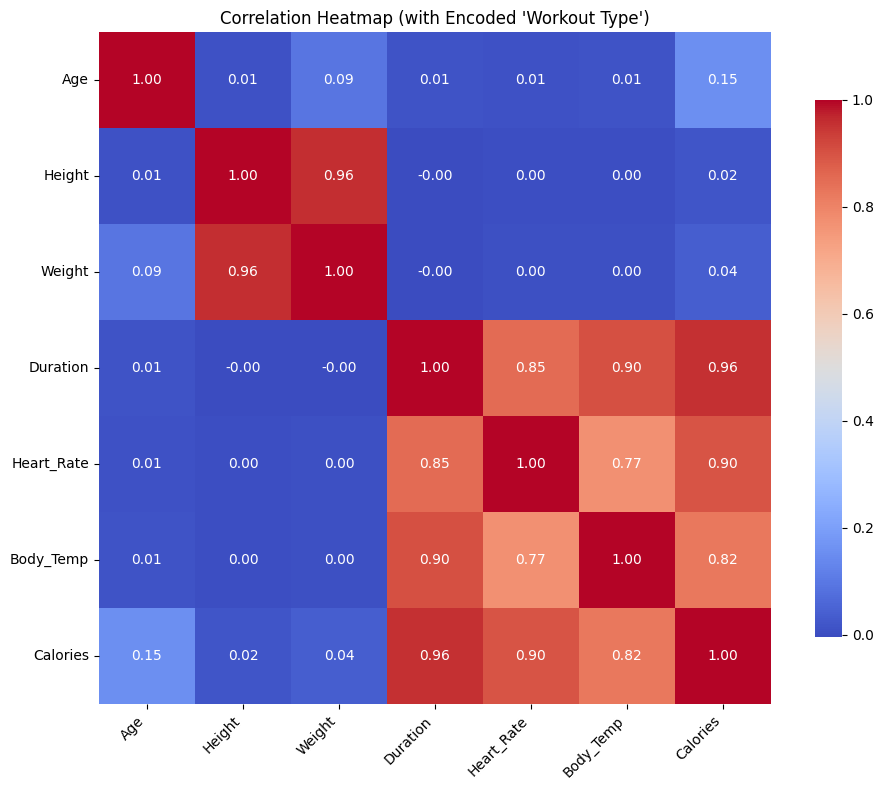

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



# Print the label mapping

# Compute correlation matrix (including the encoded Workout Type)
corr_matrix = df_cont.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap (with Encoded 'Workout Type')")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()